## Example: Polymers and the Functional Group Approximation

In this example we will reproduce the results in [1] using the functional group approximation [2] to create a model for polylactic acid (PLA). Additional descriptions of polymers used in 3D printing can be found in [3].

[1] S.R. Sebold, T. Neuwirth, A. Tengattini, R. Cubitt, I. Gilch, S. Mühlbauer, and M. Schulz. "BNPLA: borated plastic for 3D-printing of thermal and cold neutron shielding." Scientific Reports 14, no. 1 (2024): 19348.

https://doi.org/10.1038/s41598-024-70030-4

[2] G. Romanelli, D. Onorati, P. Ulpiani, S. Cancelli, E. Perelli-Cippo, JJ.I. Márquez Damián, S.C. Capelli et al. "Thermal neutron cross sections of amino acids from average contributions of functional groups." Journal of Physics: Condensed Matter 33, no. 28 (2021): 285901..

https://doi.org/10.1088/1361-648X/abfc13

[3] G. Romanelli, M. Simoni, E. Preziosi, J.I. Marquez Damian, C. Andreani, and R. Senesi. "Neutron thermal cross sections of 3D-printing organic polymers using the Average Functional Group Approximation." In EPJ Web of Conferences, vol. 284, p. 17010. EDP Sciences, 2023.

https://doi.org/10.1051/epjconf/202328417010



## Preamble
Install dependencies and prepare plots. Feel free to edit as you wish:

In [1]:
#By default we only do pip installs on Google Colab, but you
#can set the variable in the next line to True if you need it:
always_do_pip_installs = False
try:
    import google.colab as google_colab
except ModuleNotFoundError:
    google_colab=None#not on google colab
if always_do_pip_installs or google_colab:
    %pip -q install ncrystal[all] ipympl
#enable inline and interactive matplotlib plots:
if google_colab:
    google_colab.output.enable_custom_widget_manager()
    import gemmi#avoid warning later
    import spglib#avoid warning later
    %matplotlib inline
else:
    %matplotlib ipympl
import matplotlib
matplotlib.rcParams.update({"figure.autolayout": True})
#always import NCrystal:
import NCrystal as NC
assert NC.version_num >=  4000000, "too old NCrystal found"
NC.test() #< quick unit test that installation works

Tests completed succesfully


### Additional modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

## Example

We will start checking which files are available in the standard library. As we can see there are still no files for polylactic acid:

In [3]:
NC.browseFiles(dump=True)

==> 132 files from "stdlib" (stdlib, priority=120):
    AcrylicGlass_C5O2H8.ncmat
    AgBr_sg225_SilverBromide.ncmat
    Ag_sg225.ncmat
    Al2O3_sg167_Corundum.ncmat
    Al4C3_sg166_AluminiumCarbide.ncmat
    AlN_sg186_AluminumNitride.ncmat
    Al_sg225.ncmat
    Ar_Gas_STP.ncmat
    Au_sg225.ncmat
    BaF2_sg225_BariumFluoride.ncmat
    BaO_sg225_BariumOxide.ncmat
    Ba_sg229.ncmat
    Be3N2_sg206_BerylliumNitride.ncmat
    BeF2_sg152_Beryllium_Fluoride.ncmat
    BeO_sg186.ncmat
    Be_sg194.ncmat
    Bi_sg166.ncmat
    C_sg194_pyrolytic_graphite.ncmat
    C_sg227_Diamond.ncmat
    CaCO3_sg62_Aragonite.ncmat
    CaF2_sg225_CalciumFlouride.ncmat
    CaH2_sg62_CalciumHydride.ncmat
    CaO2H2_sg164_CalciumHydroxide.ncmat
    CaO_sg225_CalciumOxide.ncmat
    CaSiO3_sg2_Wollastonite.ncmat
    Ca_sg225.ncmat
    Ca_sg229_Calcium-gamma.ncmat
    CeO2_sg225_CeriumOxide.ncmat
    Cr_sg229.ncmat
    Cu2O_sg224_Cuprite.ncmat
    Cu_sg225.ncmat
    Dy2O3_sg206_DysprosiumOxide.ncmat
    Epoxy_Ar

NCrystal supports the generation of NCMAT files for hydrogen rich materials using the *average functional group approximation*. Under this approximation, the phonon spectrum of hydrogen is computed as the average of the spectra for each functional group, and the rest of the components (C, N, O) are represented with a Debye model.

Since hydrogen is a mainly incoherent scatterer with a large cross section, computing the scattering kernel in the incoherent approximation is usually not bad. But, of course, this material will not show any coherent scattering.

In [4]:
help(NC.NCMATComposer.from_hfg)

Help on function from_hfg in module NCrystal.ncmat:

from_hfg(spec, formula, *, density, title, debyetemp=400.0, verbose=True, notrim=False)
    Constructs an amorphous hydrogen-rich material via the hfg2ncmat
    function from the NCrystal.hfg2ncmat module. Refer to that function for
    usage instructions.



In [5]:
from NCrystal.hfg2ncmat import hfg2ncmat
help(hfg2ncmat)

Help on function hfg2ncmat in module NCrystal.hfg2ncmat:

hfg2ncmat(spec, formula, *, density, title, debyetemp=400.0, verbose=True, notrim=False)
    Function which can be used to generate NCMAT data for hydrogen-rich
    amorphous materials, in which the hydrogen atoms are bound to certain standard
    functional groups (e.g. carbohydrates, polyimides, polymers, ...). Based on the
    material's density, (empirical) chemical formula, and the specification of
    hydrogen bindings in terms of standard functional groups, NCMAT data is
    generated. In this NCMAT data, non-hydrogen atoms are treated with a simplistic
    model (idealised Debye model of phonon vibrations, assuming a Debye temperature
    of 400K for all atoms unless the debyetemp parameter is provided. The hydrogen
    atoms are treated with a proper phonon density of state (VDOS) curve, which is
    constructed based on the provided binding specifications. This is done using an
    idea (and VDOS curves from) the follo

The chemical formula for PLA is (C$_3$H$_4$O$_2$)$_n$. Three hydrogen atoms per monomer are part of a metyl group (CH$_3$), and one is bound in an aliphatic (CH) group.

In [6]:
c_pla = NC.NCMATComposer.from_hfg(formula='C3H4O2', spec='1xCH3+1xCHali', density=1.24, title = 'PLA')
print(c_pla())

Generated NCMAT data...
Verifying that it can be loaded with NCrystal...
Succesfully loaded...
Contribution breakdown based on composition:
  Contribution to bound scattering XS from H (incoherent) is 90.90 %
  Contribution to bound scattering XS from C (coherent)   is  4.71 %
  Contribution to bound scattering XS from O (coherent)   is  2.40 %
  Contribution to bound scattering XS from H (coherent)   is  1.99 %
  Contribution to bound scattering XS from C (incoherent) is  0.00 %
  Contribution to bound scattering XS from O (incoherent) is  0.00 %
NCMAT v7
# Autogenerated by NCMATComposer
#
# C3H4O2
#
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Comments found in NCMAT data from which the NCMATComposer
# was initialised. Subsequent updates to the NCMATComposer
# object might have invalidated some or all of these:
# >>>
# >>> PLA
# >>>
# >>> ----------------------------------------------------------------------------
# >>>
# >>> File generated by ncrystal_h

In [7]:
c_pla.register_as('pla.ncmat')

'pla.ncmat'

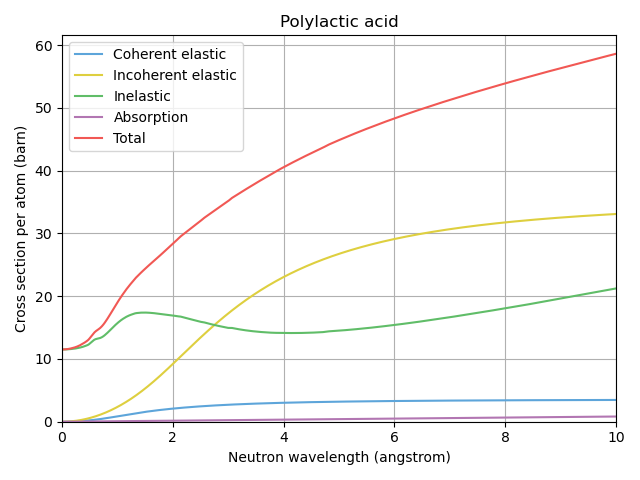

In [8]:
import NCrystal.plot as ncplot
ncplot.plot_xsect('pla.ncmat', xmin=0, xmax=10, title = 'Polylactic acid')

## Exercise:

Use the information in the paper to model polyamide (PA).